<a href="https://colab.research.google.com/github/Sampreeth3217/Bodyfat_prediction/blob/main/bodyfatpreditction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ProjectpythonTeam12/bodyfat.csv")

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))


In [5]:
df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
df.shape


(252, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [9]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Length: 252, dtype: bool

In [12]:
  df.duplicated().sum()

0

In [13]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64


<Axes: >

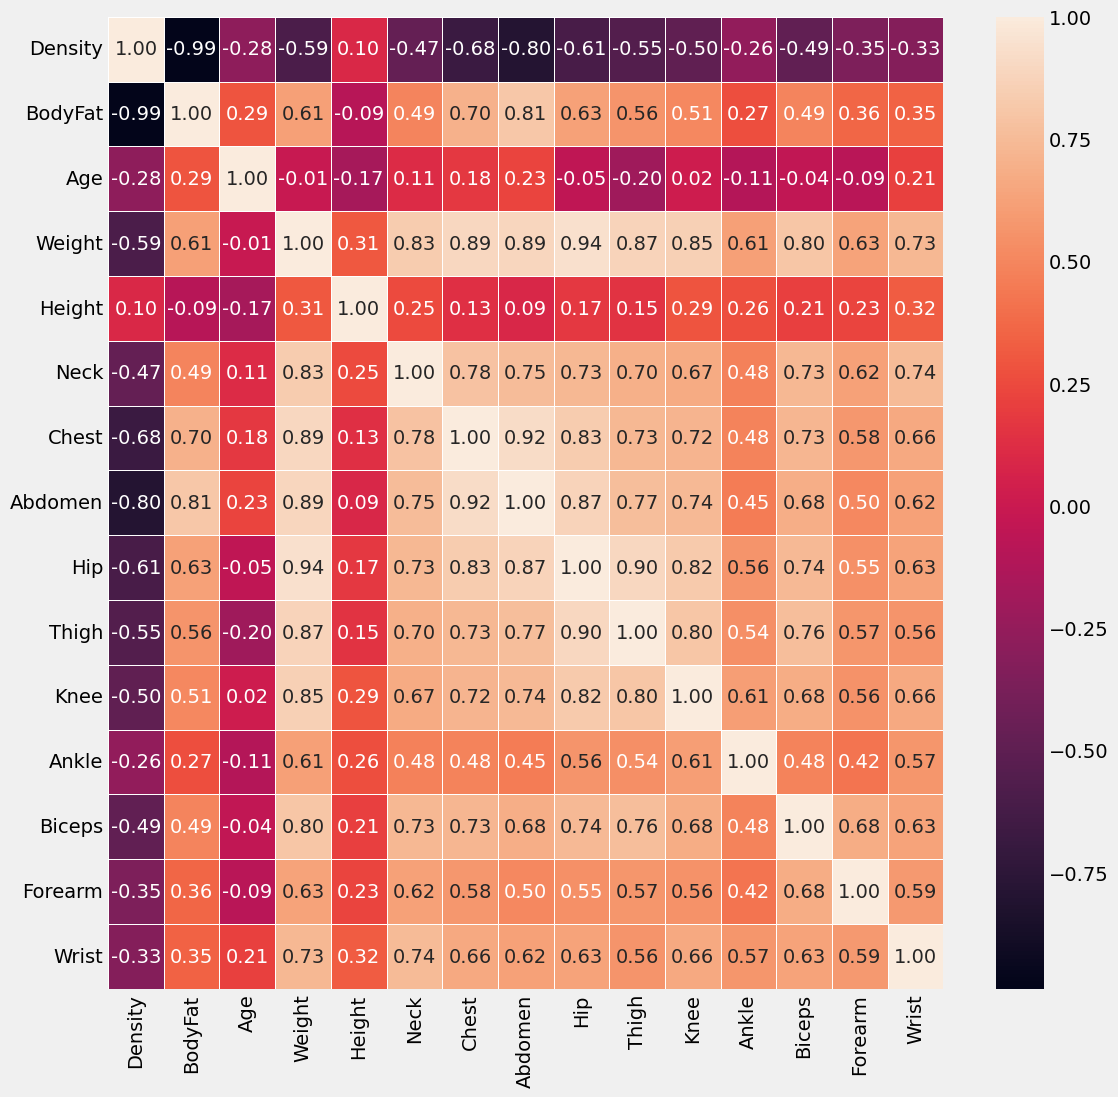

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [15]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']

In [16]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [17]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


In [18]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe
X_clean.shape

(242, 10)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)


In [20]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)


In [21]:
linear = LinearRegression()

In [22]:

def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)


In [23]:
compute(linear)


In [24]:
def predict(values):
    density = linear.predict(values)
    fat = ((4.95/density[0]) - 4.5)*100
    print(f'Density: {density[0]} g/cc\nPercentage Body Fat: {fat} %\n')

In [25]:
predict(X_test[4].reshape(1,-1))

Density: 1.0661904174421357 g/cc
Percentage Body Fat: 14.26978886898942 %



In [26]:
import pickle
pickle.dump(trans,open('transformer.pkl','wb'))
pickle.dump(linear,open('model.pkl','wb'))

In [40]:
from sklearn.metrics import mean_squared_error


In [41]:
def compute(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Visualize actual vs. predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Density')
    plt.ylabel('Predicted Density')
    plt.title('Actual vs. Predicted Density')
    plt.show()

Mean Squared Error: 0.00010171649434384421


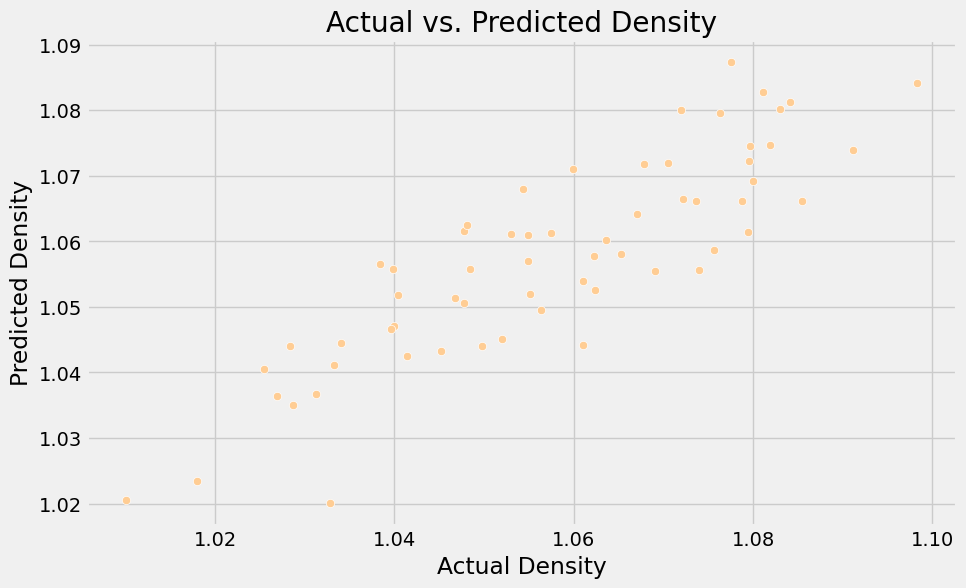

In [42]:
compute(linear)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ...

def compute(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse}')

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)
    print(f'R-squared: {r_squared}')

    return mse, rmse, mae, r_squared

# ...

mse, rmse, mae, r_squared = compute(linear)


Mean Squared Error: 0.00010171649434384421
Root Mean Squared Error: 0.01008545955045402
Mean Absolute Error: 0.008716851000936358
R-squared: 0.7384666194733469


In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
mse, rmse, mae, r_squared = compute(linear)


Mean Squared Error: 0.00010171649434384421
Root Mean Squared Error: 0.01008545955045402
Mean Absolute Error: 0.008716851000936358
R-squared: 0.7384666194733469


In [46]:
metrics_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared']
metrics_values = [mse, rmse, mae, r_squared]

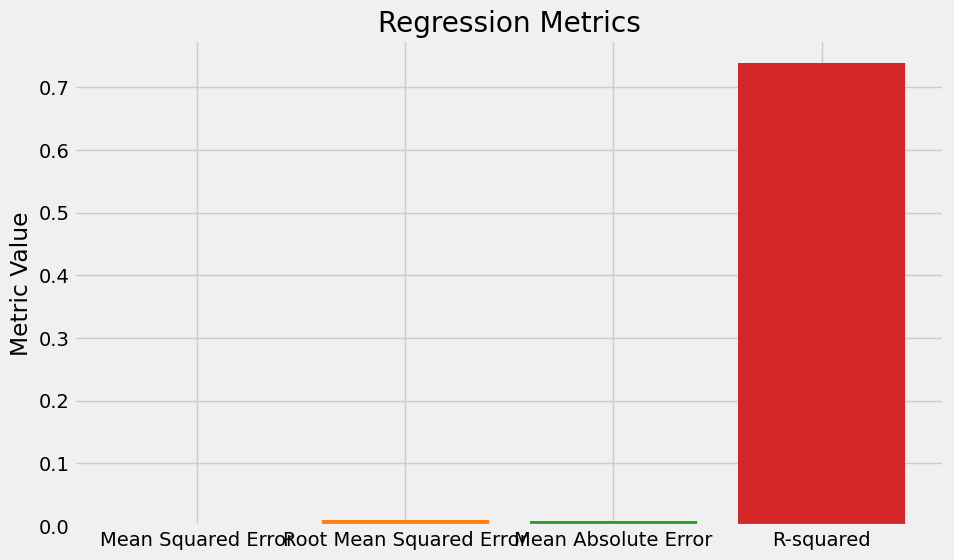

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Regression Metrics')
plt.ylabel('Metric Value')
plt.show()